# FastAi Development

### Loading Libraries

In [1]:
# Operation System
import os

# FastAI
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.MNIST)
print(path)

/Users/joaquinromero/.fastai/data/mnist_png


In [3]:
files = get_image_files(path/"training")
print(len(files))
print(files[0])

60000
/Users/joaquinromero/.fastai/data/mnist_png/training/9/36655.png


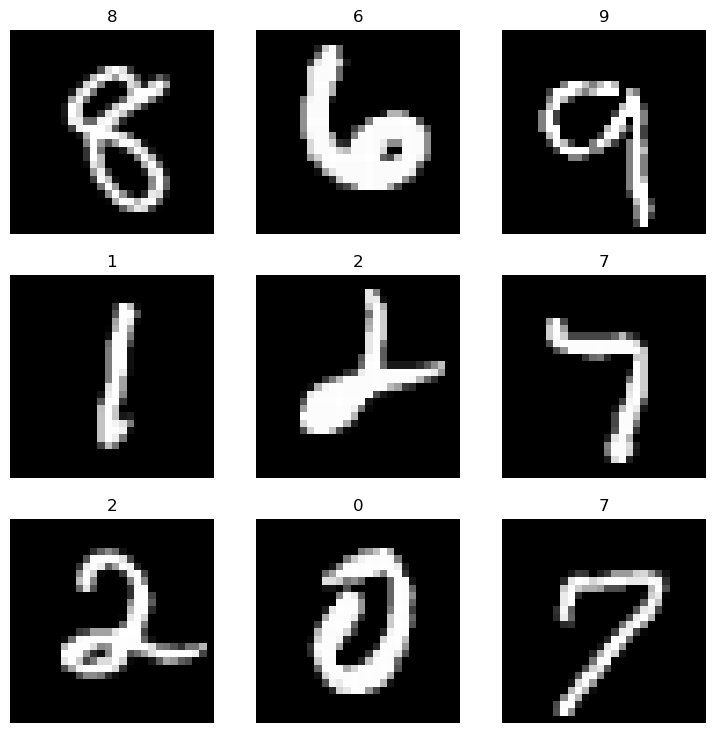

In [4]:
def label_func(f): return f.parent.name
dls = ImageDataLoaders.from_path_func(path, fnames=files, label_func=label_func, num_workers=0)
dls.show_batch()

In [5]:
learn = cnn_learner(dls, arch=resnet18, metrics=accuracy)

/opt/anaconda3/envs/MPT/lib/python3.12/site-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/joaquinromero/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████████████████████████████████| 44.7M/44.7M [00:00<00:00, 59.5MB/s]


SuggestedLRs(valley=0.001737800776027143)

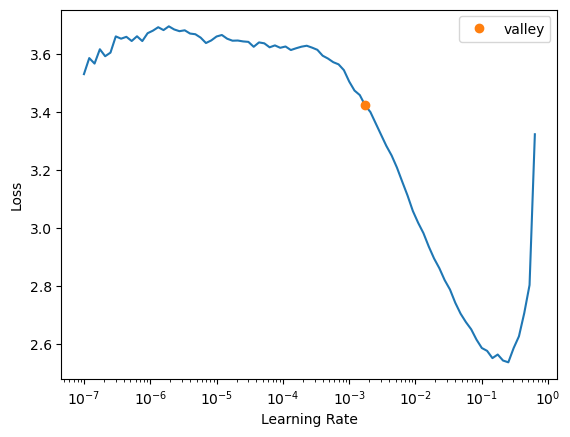

In [6]:
learn.lr_find()

In [7]:
learn.fine_tune(epochs=2, base_lr=0.0209, freeze_epochs=1)

epoch,train_loss,valid_loss,accuracy,time
0,0.388165,0.252012,0.922500,00:21


epoch,train_loss,valid_loss,accuracy,time
0,0.135242,0.052477,0.985750,00:26
1,0.029188,0.028272,0.992000,00:26


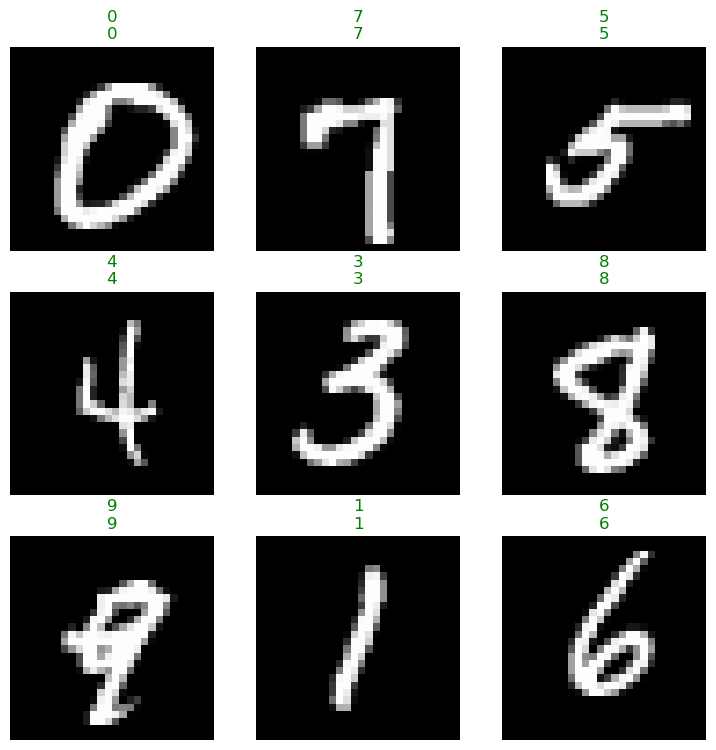

In [8]:
learn.show_results()

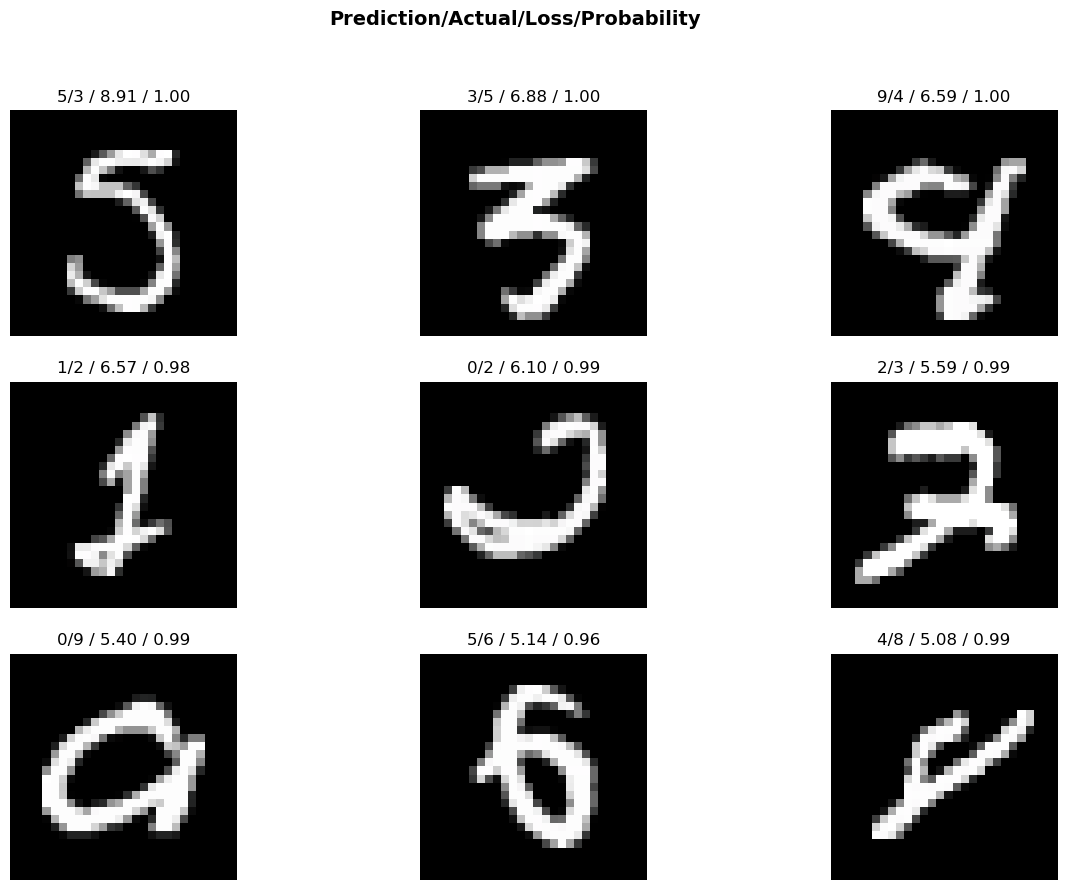

In [9]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))